# 用tensor的backward编写神经网络训练程序，预测线性函数的数据


In [1]:
#导入需要使用的库
import numpy as np
import pandas as pd #读取csv文件的库
import matplotlib.pyplot as plt
import torch
import torch.optim as optim

# 让输出的图形直接在Notebook中显示
%matplotlib inline

## 1.读取数据

In [2]:
#读取数据到内存中，rides为一个dataframe对象
# 这个数据是由此代码生成的D:\GitHub\book_DeepLearning_in_PyTorch_Source\anders-test\myc3\gen-data.py
# 此代码可以显示此数据D:\GitHub\book_DeepLearning_in_PyTorch_Source\anders-test\myc3\show-data.py
data_path = 'liner-data1.csv'
rides = pd.read_csv(data_path)

print(rides.shape)
rowCount = rides.shape[0]
#看看数据长什么样子
rides


(200, 2)


,x,y
0,1.0,5.558783
1,2.0,7.299084
2,3.0,-0.367392
3,4.0,27.142078
4,5.0,20.383396
...,...,...
195,196.0,191.009580
196,197.0,197.313060
197,198.0,195.038330
198,199.0,196.471270


## 2.将数据转成tensor数组

In [3]:
xx_arr=rides.drop(['y'], axis=1).values
# print(xx)
yy_arr=rides.drop(['x'], axis=1).values
# print(yy)
xx = torch.tensor(xx_arr, dtype = torch.float, requires_grad = True)
yy = torch.tensor(yy_arr, dtype = torch.float, requires_grad = True)
print(xx.shape)
print(xx)

torch.Size([200, 1])
tensor([[  1.],
        [  2.],
        [  3.],
        [  4.],
        [  5.],
        [  6.],
        [  7.],
        [  8.],
        [  9.],
        [ 10.],
        [ 11.],
        [ 12.],
        [ 13.],
        [ 14.],
        [ 15.],
        [ 16.],
        [ 17.],
        [ 18.],
        [ 19.],
        [ 20.],
        [ 21.],
        [ 22.],
        [ 23.],
        [ 24.],
        [ 25.],
        [ 26.],
        [ 27.],
        [ 28.],
        [ 29.],
        [ 30.],
        [ 31.],
        [ 32.],
        [ 33.],
        [ 34.],
        [ 35.],
        [ 36.],
        [ 37.],
        [ 38.],
        [ 39.],
        [ 40.],
        [ 41.],
        [ 42.],
        [ 43.],
        [ 44.],
        [ 45.],
        [ 46.],
        [ 47.],
        [ 48.],
        [ 49.],
        [ 50.],
        [ 51.],
        [ 52.],
        [ 53.],
        [ 54.],
        [ 55.],
        [ 56.],
        [ 57.],
        [ 58.],
        [ 59.],
        [ 60.],
        [ 61.],
   

In [4]:
x = xx.view(rowCount, -1)
print("x2:",x)

x2: tensor([[  1.],
        [  2.],
        [  3.],
        [  4.],
        [  5.],
        [  6.],
        [  7.],
        [  8.],
        [  9.],
        [ 10.],
        [ 11.],
        [ 12.],
        [ 13.],
        [ 14.],
        [ 15.],
        [ 16.],
        [ 17.],
        [ 18.],
        [ 19.],
        [ 20.],
        [ 21.],
        [ 22.],
        [ 23.],
        [ 24.],
        [ 25.],
        [ 26.],
        [ 27.],
        [ 28.],
        [ 29.],
        [ 30.],
        [ 31.],
        [ 32.],
        [ 33.],
        [ 34.],
        [ 35.],
        [ 36.],
        [ 37.],
        [ 38.],
        [ 39.],
        [ 40.],
        [ 41.],
        [ 42.],
        [ 43.],
        [ 44.],
        [ 45.],
        [ 46.],
        [ 47.],
        [ 48.],
        [ 49.],
        [ 50.],
        [ 51.],
        [ 52.],
        [ 53.],
        [ 54.],
        [ 55.],
        [ 56.],
        [ 57.],
        [ 58.],
        [ 59.],
        [ 60.],
        [ 61.],
        [ 62.],
    

## 2.构建神经网络

In [5]:
# 设置隐含层神经元的数量
sz = 1

# 初始化所有神经网络的权重（weights）和阈值（biases）
weights = torch.randn((1, sz), dtype = torch.double, requires_grad = True) #1*10的输入到隐含层的权重矩阵
# print("weights:",weights)
biases = torch.randn(sz, dtype = torch.double, requires_grad = True) #尺度为10的隐含层节点偏置向量
# print("biases:",biases)
weights2 = torch.randn((sz, 1), dtype = torch.double, requires_grad = True) #10*1的隐含到输出层权重矩阵

learning_rate = 0.001 #设置学习率
losses = []

# 将 x 转换为(200,1)的维度，以便与维度为(1,10)的weights矩阵相乘
x = xx.view(rowCount, -1)
# print("x2:",x)
# 将 y 转换为(200,1)的维度
y = yy.view(rowCount, -1)
# print("y2:",y)




## 3.训练

In [6]:
for i in range(100000):
    # 从输入层到隐含层的计算
    # print("biases:",biases)
    # print("x * weights:",x * weights)
    # print("x * weights+ biases:",x * weights+ biases)
    hidden = x * weights + biases
    
    # 将sigmoid函数作用在隐含层的每一个神经元上
    hidden = torch.sigmoid(hidden)
    # hidden此时有50行，每行代表一条训练数据，10列，每列是神经元的值  
    # print("hidden:",hidden)
    #print(hidden.size())
    # 隐含层输出到输出层，计算得到最终预测
    predictions = hidden.mm(weights2)#
    # predictions此时有50行，1列，即最终结果     
    #print(predictions.size())
    # 通过与标签数据y比较，计算均方误差
    loss = torch.mean((predictions - y) ** 2) 
    #print(loss.size())
    losses.append(loss.data.numpy())
    
    # 每隔10000个周期打印一下损失函数数值
    if i % 10000 == 0:
        print('loss:', loss)
        
    #对损失函数进行梯度反传
    loss.backward()
    
    #利用上一步计算中得到的weights，biases等梯度信息更新weights或biases中的data数值
    weights.data.add_(- learning_rate * weights.grad.data)  
    biases.data.add_(- learning_rate * biases.grad.data)
    weights2.data.add_(- learning_rate * weights2.grad.data)
    
    # 清空所有变量的梯度值。
    # 因为pytorch中backward一次梯度信息会自动累加到各个变量上，因此需要清空，否则下一次迭代会累加，造成很大的偏差
    weights.grad.data.zero_()
    biases.grad.data.zero_()
    weights2.grad.data.zero_()
print(weights)
print(biases)
print(weights2)



loss: tensor(13533.6048, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(3467.2928, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(3467.2928, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(3467.2928, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(3467.2928, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(3467.2928, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(3467.2928, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(3467.2928, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(3467.2928, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(3467.2928, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor([[13.2660]], dtype=torch.float64, requires_grad=True)
tensor([-0.7475], dtype=torch.float64, requires_grad=True)
tensor([[100.3314]], dtype=torch.float64, requires_grad=True)


## 4.图形展示损失值

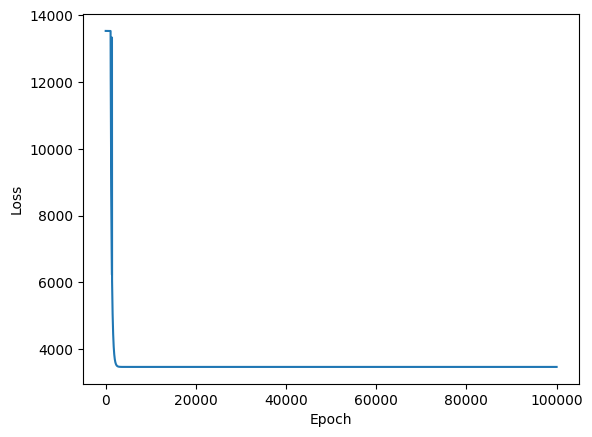

In [7]:
# 打印误差曲线
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## 5.原始数据的图像和预测数据的图像

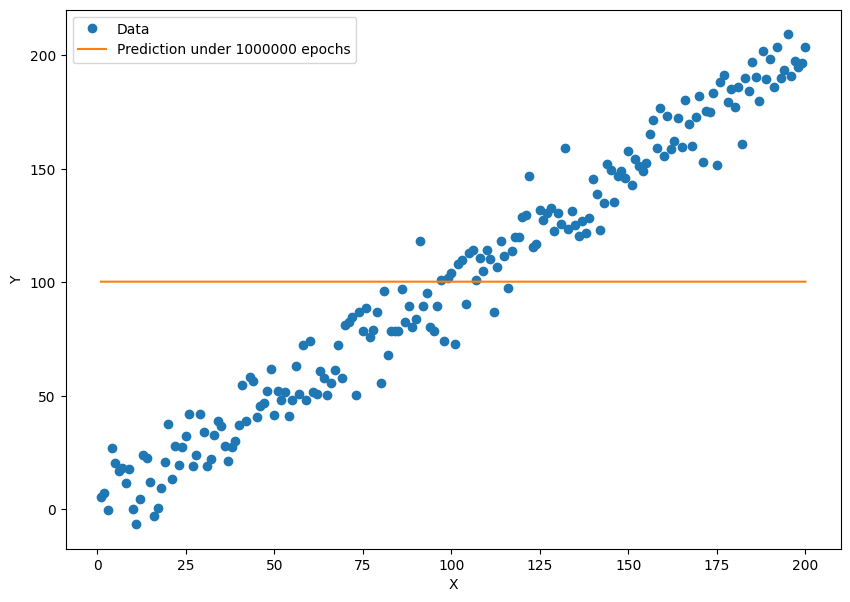

In [8]:
x_data = x.data.numpy() # 获得x包裹的数据
plt.figure(figsize = (10, 7)) #设定绘图窗口大小
xplot, = plt.plot(x_data, y.data.numpy(), 'o') # 绘制原始数据

yplot, = plt.plot(x_data, predictions
                  .data.numpy())  #绘制拟合数据
plt.xlabel('X') #更改坐标轴标注
plt.ylabel('Y') #更改坐标轴标注
plt.legend([xplot, yplot],['Data', 'Prediction under 1000000 epochs']) #绘制图例
plt.show()

## 5.分析为啥错了

In [23]:
myweight=13.2660
mybiase=-0.7475
myweight2=100.3314
myx=20
myHidden=myx*myweight+mybiase
print(myHidden)

264.5725


In [24]:
myHiddenSigmoid = torch.sigmoid(torch.tensor([myHidden]))
print(myHiddenSigmoid)

tensor([1.])


In [25]:
from math import exp
def mySigmoid(x):
    return 1 / (1+exp(-x))

In [26]:
mySigmoid(myHidden)

1.0